In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from google.colab import drive
drive.mount('/content/drive')

In [0]:
drive_4km="/content/drive/My Drive/Colab Notebooks/model_vs_data/Coron_4km_h24toh48_dir/"
drive_1km="/content/drive/My Drive/Colab Notebooks/model_vs_data/Coron_Mars_H24to48_dir/"
dr=[drive_4km,drive_1km]
y_data=pd.read_excel(dr[0]+"y_coron_spd.xlsx",index_col=0)
x_data=pd.read_csv(dr[0]+"x_coron.csv",index_col=0)
x_data=x_data.iloc[:,9:19]# Speed columns 
y_data=y_data[y_data>0]#station errors 
y_data=y_data/3.6
result = x_data.join(y_data, how='outer').dropna()
x_data=result.iloc[:,0:9]
y_data=result["value"]

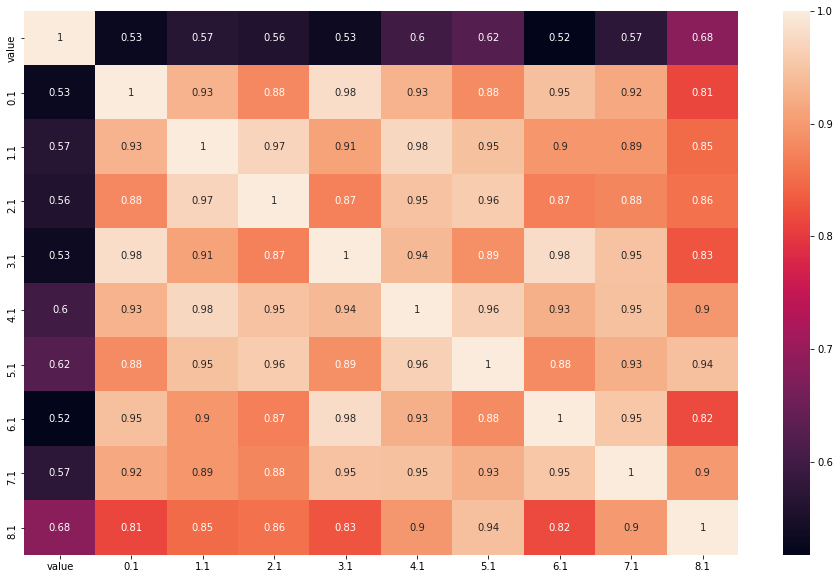

In [4]:
df2=pd.concat([y_data, x_data], axis=1)
plt.figure(figsize=(16, 10))
sns.heatmap(df2.corr(),annot=True)

<Figure size 1152x720 with 0 Axes>

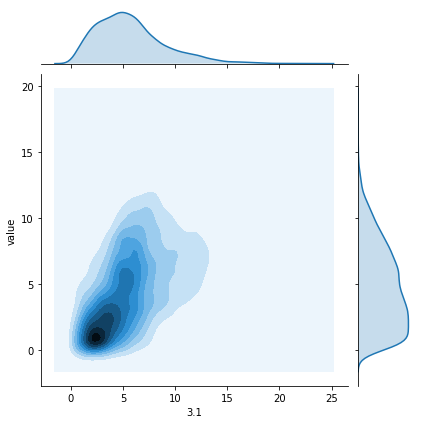

In [5]:
plt.figure(figsize=(16, 10))
ax=sns.jointplot("3.1", "value", data=df2, kind="kde",)

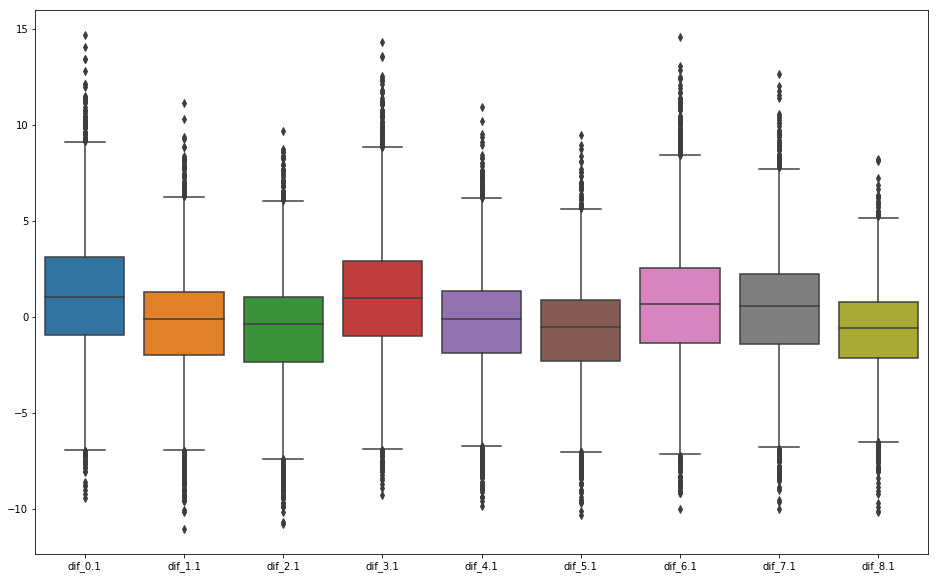

In [6]:
for column in df2.columns:
  df2["dif_"+column]=df2[column]-df2["value"]
  df2["dif_"+column]=df2["dif_"+column][df2["dif_"+column]<180]
  df2["dif_"+column]=df2["dif_"+column][df2["dif_"+column]>-180]
plt.figure(figsize=(16, 10))
ax = sns.boxplot(data=df2.iloc[:,11:20])  

In [7]:
df2.iloc[:,11:20].describe()

,dif_0.1,dif_1.1,dif_2.1,dif_3.1,dif_4.1,dif_5.1,dif_6.1,dif_7.1,dif_8.1
count,8498.000000,8498.000000,8498.000000,8498.000000,8498.000000,8498.000000,8498.000000,8498.000000,8498.000000
mean,1.096954,-0.417172,-0.718284,1.000367,-0.331109,-0.746300,0.677302,0.438394,-0.719939
std,3.092473,2.723353,2.731948,3.105772,2.613668,2.489095,3.164914,2.830131,2.270412
min,-9.453890,-11.072458,-10.784757,-9.266948,-9.852481,-10.325730,-10.020242,-10.008160,-10.172059
25%,-0.941904,-2.014650,-2.358056,-1.010839,-1.904300,-2.287110,-1.363155,-1.406510,-2.147382
50%,1.037541,-0.128301,-0.399833,0.947470,-0.104345,-0.519249,0.643302,0.537778,-0.592663
75%,3.087445,1.287369,1.008001,2.924896,1.331104,0.881823,2.551677,2.243128,0.772962
max,14.674808,11.115168,9.677141,14.321733,10.942607,9.454548,14.580314,12.651886,8.215600
